# Basic Pipeline
1. Get the dataset
2. Split the dataset: Train set, Validation set, Test set
3. Scale datasets
4. Create model: output layer, Output "# of class" and activation="softmax"
5. Compile: model.compile(), Designate "loss", "optimizer" and "metrics"
6. Train: model.fit(), Designate "Train Set", "Validation Set" and "Epochs"
7. Evaluate: model.evaluate(), Designate "Test Set"
8. Predict: model.predict()

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
print("Tensorflow version:", tf.__version__)
print("tf.keras version:", keras.__version__)

Tensorflow version: 2.2.0
tf.keras version: 2.3.0-tf


# 1. Get the dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print("Dataset Shape:", X_train_full.shape)
print("Dataset dtype:", X_train_full.dtype)

Dataset Shape: (60000, 28, 28)
Dataset dtype: uint8


# 2. Split the dataset: Train Set, Validation Set

In [3]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# 3. Scale datasets

In [4]:
X_train, X_valid = X_train / 255.0, X_valid / 255.0
X_test = X_test / 255.0

In [5]:
class_name = ["T-shirt/top", "Trouser", "Pullover",
              "Dress", "Coat", "Sandal", "Shirt",
              "Sneaker", "Bag", "Ankle boot"]

# 4. Creating the model

In [6]:
# Flatten layer: convert input image X into a 1D array
# Dense layer: full connection layer
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    # For Classifier
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Fetch each layer
model.layers

In [9]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [10]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06227823,  0.01197328,  0.05799264, ...,  0.03184053,
        -0.0107187 ,  0.00061121],
       [ 0.02100314, -0.07153964, -0.05519199, ..., -0.05200735,
         0.05375205,  0.03008347],
       [-0.05321269,  0.01963454,  0.04514584, ...,  0.07032864,
        -0.06168018,  0.01929905],
       ...,
       [-0.04492895,  0.01251812,  0.06111287, ...,  0.06518453,
         0.01779126, -0.05233795],
       [ 0.05928771, -0.03418008, -0.03281257, ..., -0.00739184,
        -0.01403369,  0.06417131],
       [ 0.00081896, -0.02368153, -0.05420084, ..., -0.06049637,
        -0.03418162, -0.03434912]], dtype=float32)

In [11]:
weights.shape

(784, 300)

In [12]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
biases.shape

(300,)

# 5. Compiling the model

In [14]:
# metrics=["accuracy"] is equivalent to metrics=[keras.metrics.sparse_categorical_accuracy] when using loss "sparse_categorical_crossentropy"
# A metric is a function that is used to judge the performance of your model.
# Metric functions are similar to loss functions, 
# except that the results from evaluating a metric are not used when training the model.
# Metric values are displayed during fit() and logged to the History object returned by fit(). 
# They are also returned by model.evaluate().
# Check: https://keras.io/api/metrics/
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 6. Train

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7393 - accuracy: 0.7578 - val_loss: 0.5498 - val_accuracy: 0.8062
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4906 - accuracy: 0.8301 - val_loss: 0.4336 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4457 - accuracy: 0.8447 - val_loss: 0.4141 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4185 - accuracy: 0.8526 - val_loss: 0.4001 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8617 - val_loss: 0.3801 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3818 - accuracy: 0.8654 - val_loss: 0.3807 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3665 - accuracy: 0.8688 - val_loss: 0.3689 - val_accuracy:

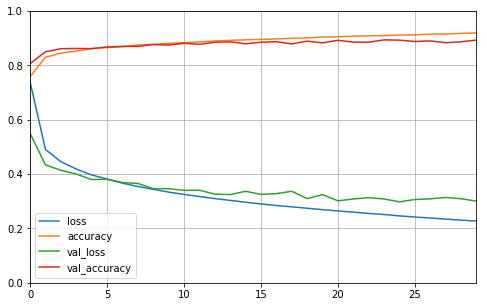

In [16]:
# Learing curves
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 7. Evaluate

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8819


[0.33405831456184387, 0.8819000124931335]

# 8. Predict

In [18]:
X_new = X_test[:3]
# Get the Probability of classes
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
# Directly get the predicted class
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [23]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [24]:
import numpy as np
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')